In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv(r"C:\Users\Vishma A S\OneDrive\Desktop\vishh\titanic_prediction\Titanic-Dataset.csv")

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data["Age"].max()


np.float64(80.0)

In [19]:
data["Age"].min()


np.float64(0.42)

In [20]:
data["Age"].mean()


np.float64(29.69911764705882)

In [21]:
data["Age"].median()


np.float64(28.0)

In [22]:
data["Age"].value_counts()


Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [23]:
data["Age"]=data["Age"].fillna(data["Age"].mean())


In [24]:
data["Age"]=data["Age"].astype(int)


In [25]:
data["Age"].value_counts()


Age
29    197
24     31
22     27
28     27
30     27
     ... 
66      1
12      1
53      1
80      1
74      1
Name: count, Length: 71, dtype: int64

In [26]:
data["Cabin"].value_counts()


Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [27]:
data.drop("Cabin",axis=1,inplace=True)


In [28]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [29]:
data["Embarked"].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [30]:
data.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [31]:
data.duplicated().sum()


np.int64(0)

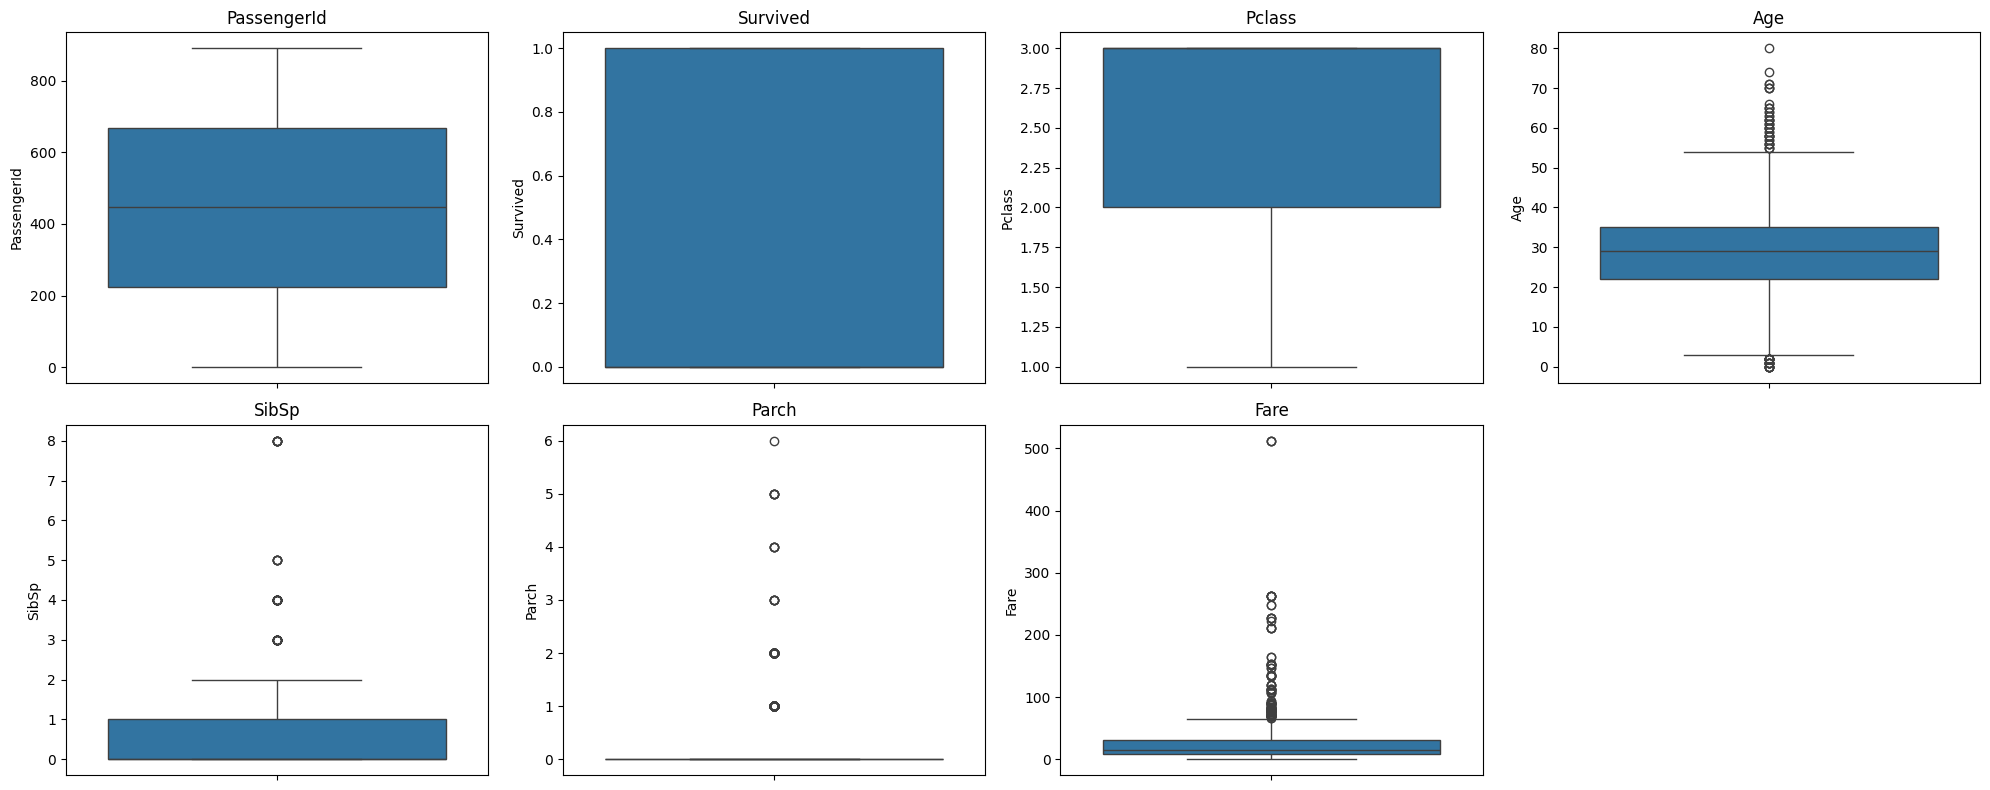

In [32]:
numeric_cols = data.select_dtypes(include='number').columns
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [33]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f"Outliers in {col}: {outliers.shape[0]}")

Outliers in PassengerId: 0
Outliers in Survived: 0
Outliers in Pclass: 0
Outliers in Age: 66
Outliers in SibSp: 46
Outliers in Parch: 213
Outliers in Fare: 116


In [34]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower, upper=upper)

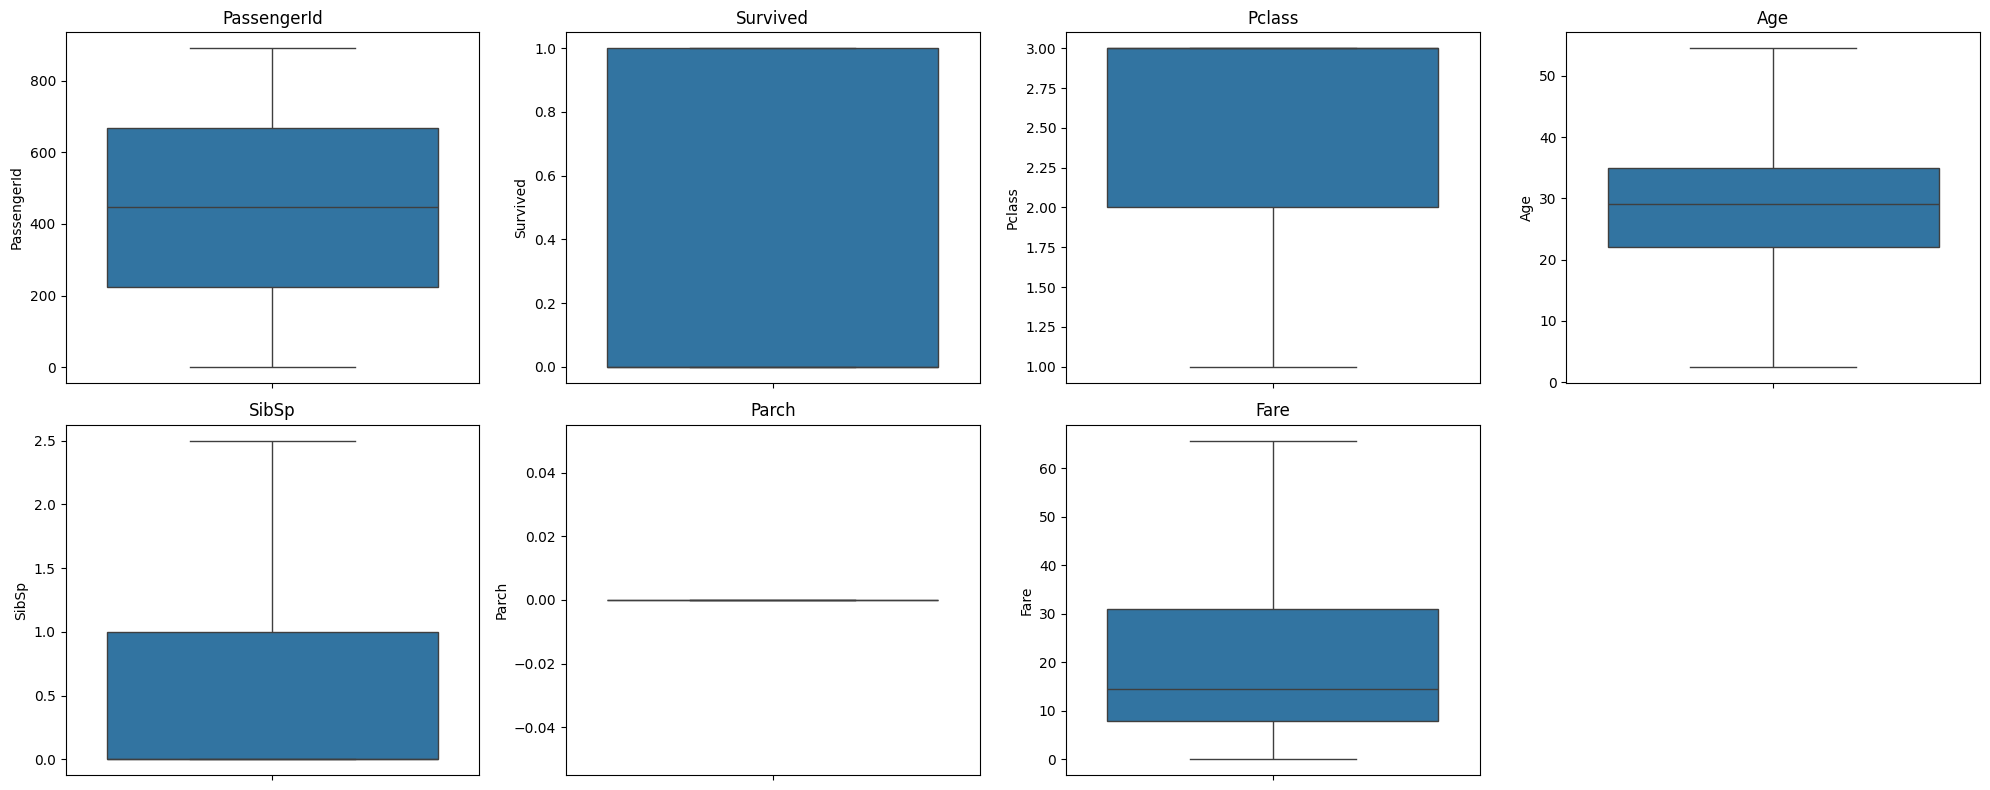

In [35]:
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [36]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 76.7+ KB


In [37]:
data[["Age","SibSp"]]=data[["Age","SibSp"]].astype(int)

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


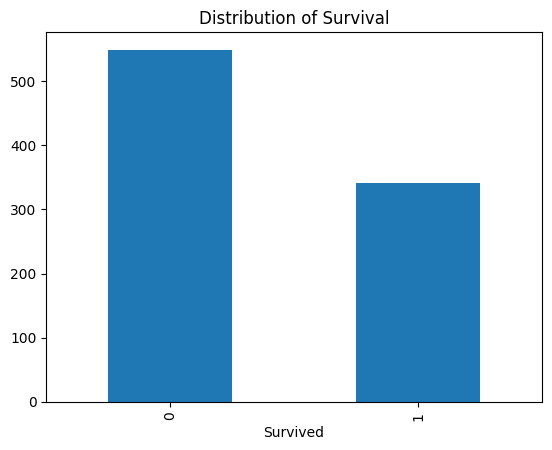

In [39]:
data["Survived"].value_counts().plot(kind="bar")
plt.title("Distribution of Survival")
plt.show()


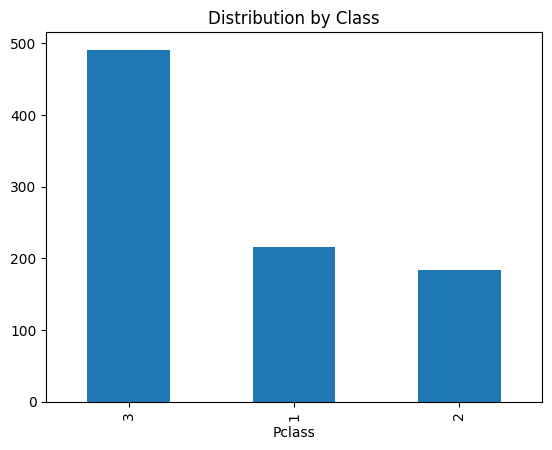

In [40]:
data["Pclass"].value_counts().plot(kind="bar")
plt.title("Distribution by Class")
plt.show()


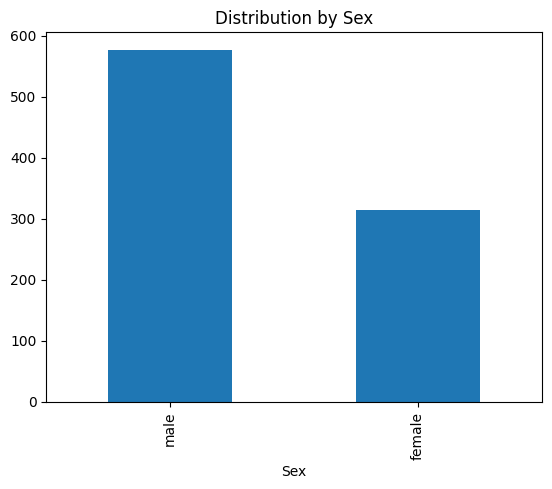

In [41]:
data["Sex"].value_counts().plot(kind="bar")
plt.title("Distribution by Sex")
plt.show()

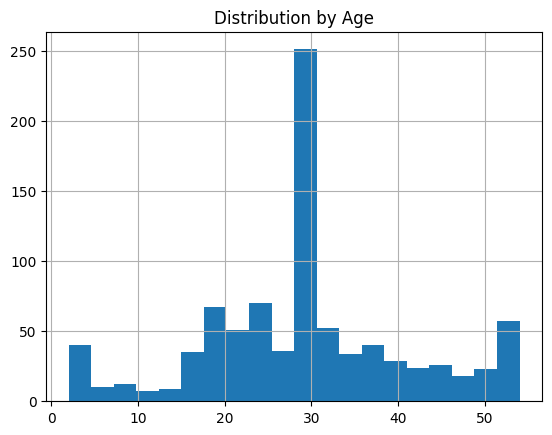

In [42]:
data["Age"].hist(bins= 20)
plt.title("Distribution by Age")
plt.show()

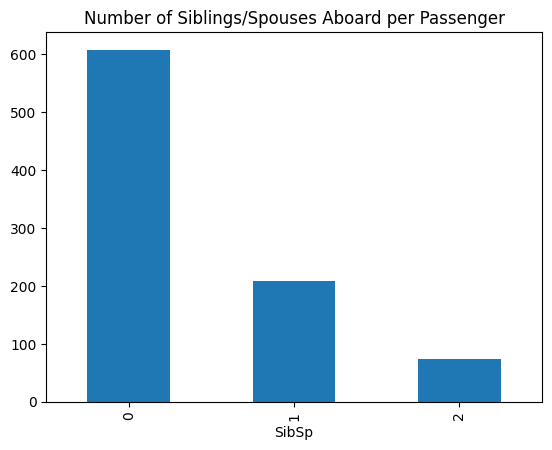

In [43]:
data["SibSp"].value_counts().plot(kind="bar")
plt.title("Number of Siblings/Spouses Aboard per Passenger")
plt.show()

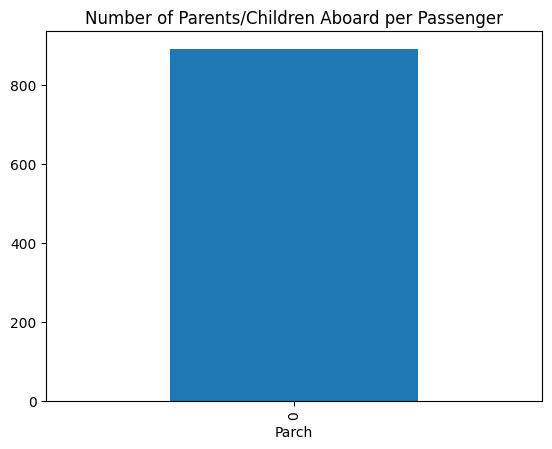

In [44]:
data["Parch"].value_counts().plot(kind="bar")
plt.title("Number of Parents/Children Aboard per Passenger")
plt.show()

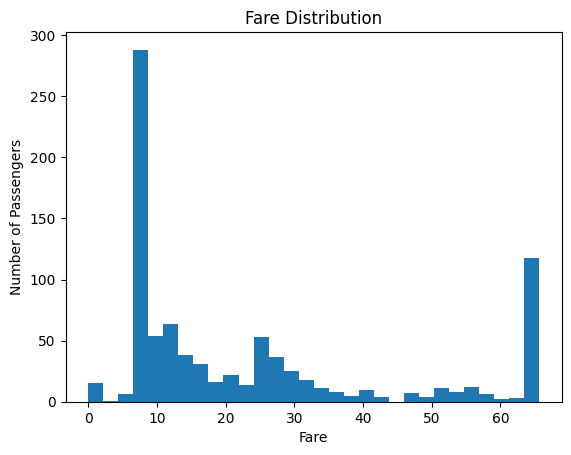

In [45]:
data["Fare"].plot(kind="hist", bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.show()

Text(0.5, 1.0, 'Passenger Count by Embarkation Port')

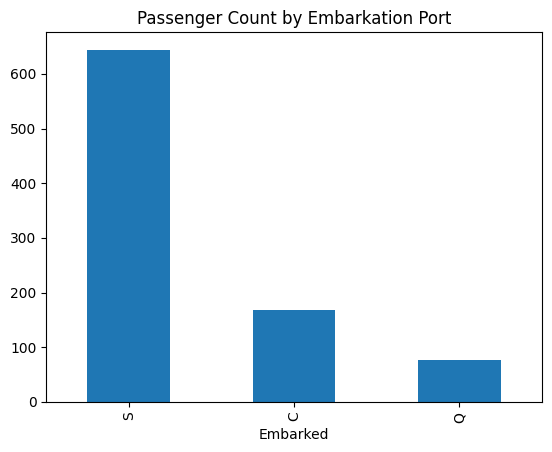

In [46]:
data["Embarked"].value_counts().plot(kind="bar")
plt.title("Passenger Count by Embarkation Port")

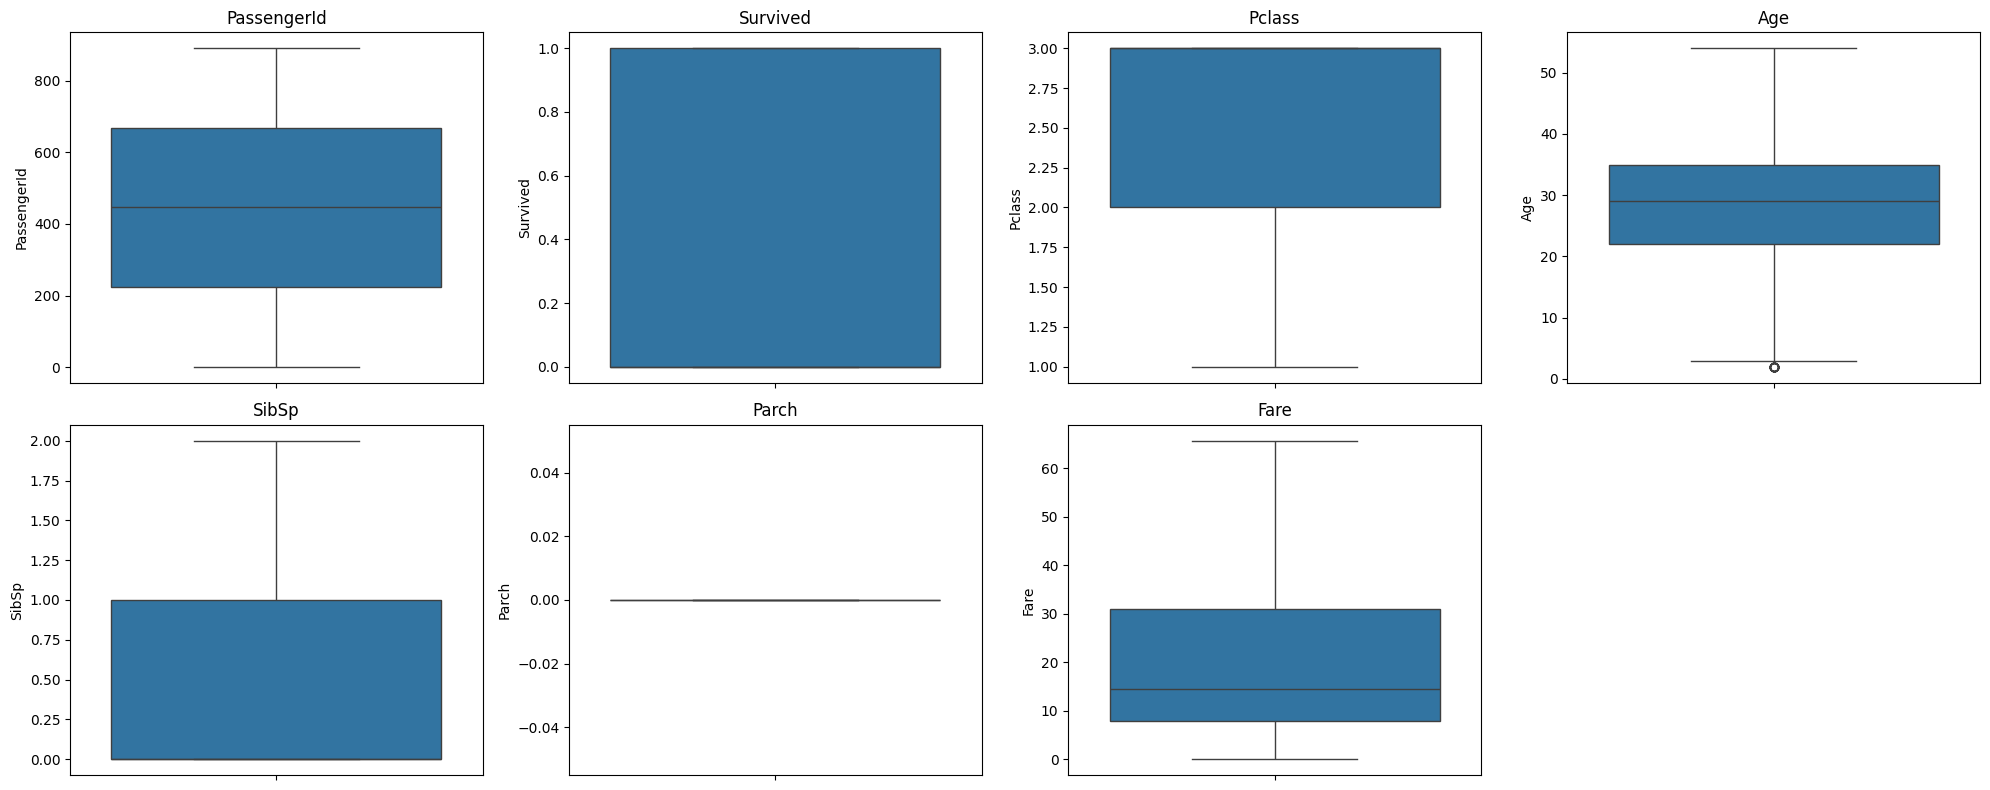

In [47]:
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, recall_score,
                             precision_score, f1_score)

In [49]:
data.drop(['PassengerId', 'Name', 'Ticket'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,65.6344,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [50]:
le=LabelEncoder()
for col in ['Sex', 'Embarked']:
    data[col]=le.fit_transform(data[col])

In [51]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [54]:
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [56]:
lr.fit(x_train,y_train)


LogisticRegression()

In [57]:
y_pred=lr.predict(x_test)


In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
recall = recall_score(y_test, y_pred)

print(f"Recall: {recall*100:.2f}%")
precision = precision_score(y_test, y_pred)

print(f"Precision: {precision*100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 83.33%
Recall: 83.33%
Precision: 76.92%
F1 Score: 80.00%


In [59]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.83      0.86        54
           1       0.77      0.83      0.80        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



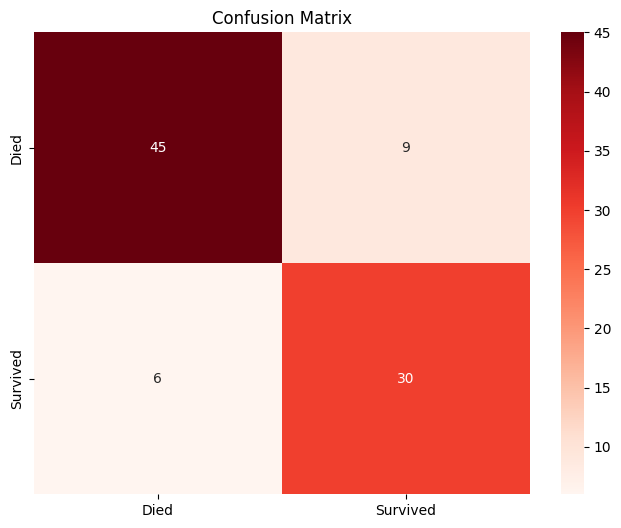

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds',
           xticklabels=['Died', 'Survived'],
           yticklabels=['Died', 'Survived'])
plt.title("Confusion Matrix")
plt.show()

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 5)

In [65]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [67]:
y_pred=knn.predict(x_test)


In [69]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
recall = recall_score(y_test, y_pred)

print(f"Recall: {recall*100:.2f}%")
precision = precision_score(y_test, y_pred)

print(f"Precision: {precision*100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 81.11%
Recall: 80.56%
Precision: 74.36%
F1 Score: 77.33%


In [70]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.81      0.84        54
           1       0.74      0.81      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90



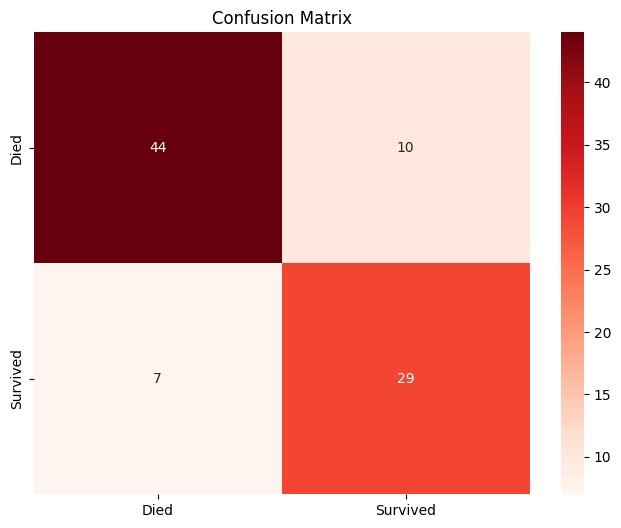

In [72]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds',
           xticklabels=['Died', 'Survived'],
           yticklabels=['Died', 'Survived'])
plt.title("Confusion Matrix")
plt.show()

In [74]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()

In [75]:
nb.fit(x_train,y_train)


GaussianNB()

In [76]:
y_pred=nb.predict(x_test)


In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
recall = recall_score(y_test, y_pred)

print(f"Recall: {recall*100:.2f}%")
precision = precision_score(y_test, y_pred)

print(f"Precision: {precision*100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 74.44%
Recall: 86.11%
Precision: 63.27%
F1 Score: 72.94%


In [79]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.67      0.76        54
           1       0.63      0.86      0.73        36

    accuracy                           0.74        90
   macro avg       0.76      0.76      0.74        90
weighted avg       0.78      0.74      0.75        90



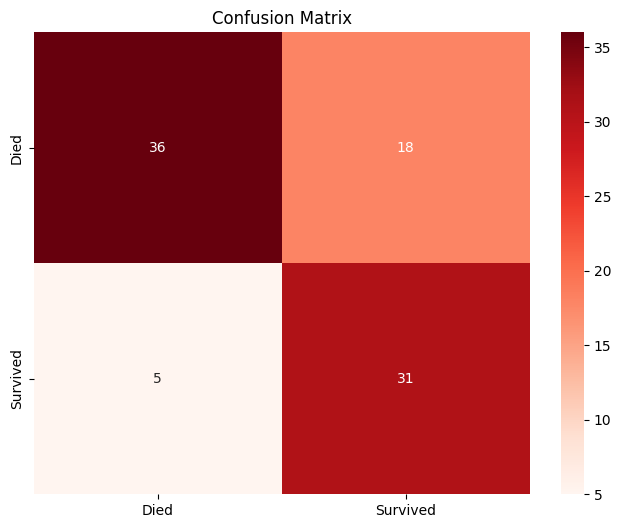

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds',
           xticklabels=['Died', 'Survived'],
           yticklabels=['Died', 'Survived'])
plt.title("Confusion Matrix")
plt.show()

In [83]:
from sklearn.svm import SVC


In [85]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf', C=2, gamma='scale')

In [87]:
svc.fit(x_train,y_train)


SVC(C=2)

In [89]:
y_pred=svc.predict(x_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
recall = recall_score(y_test, y_pred)

print(f"Recall: {recall*100:.2f}%")
precision = precision_score(y_test, y_pred)

print(f"Precision: {precision*100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 85.56%
Recall: 77.78%
Precision: 84.85%
F1 Score: 81.16%


In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        54
           1       0.85      0.78      0.81        36

    accuracy                           0.86        90
   macro avg       0.85      0.84      0.85        90
weighted avg       0.86      0.86      0.85        90



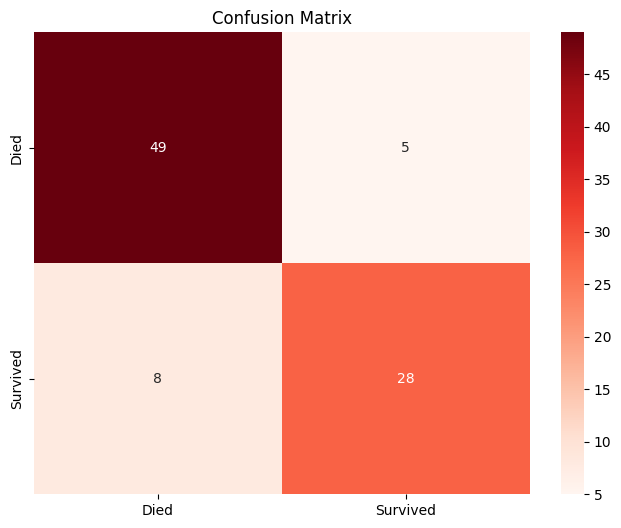

In [95]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds',
           xticklabels=['Died', 'Survived'],
           yticklabels=['Died', 'Survived'])
plt.title("Confusion Matrix")
plt.show()

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=0)

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [101]:
train_accuracy = accuracy_score(y_train, dtree.predict(x_train))
test_accuracy = accuracy_score(y_test, dtree.predict(x_test))
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Train Accuracy: 84.55%
Test Accuracy: 82.12%


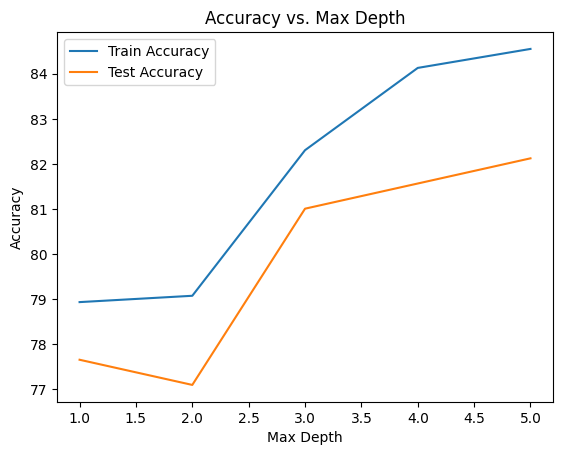

In [103]:
train_accuracies = []
test_accuracies = []
max_depths = range(1, 6)

for depth in max_depths:
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    dtree.fit(x_train, y_train)
    train_accuracy = accuracy_score(y_train, dtree.predict(x_train)) * 100
    test_accuracy = accuracy_score(y_test, dtree.predict(x_test)) * 100
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(max_depths, train_accuracies, label='Train Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth')
plt.legend()
plt.show()

In [105]:
y_pred = dtree.predict(x_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



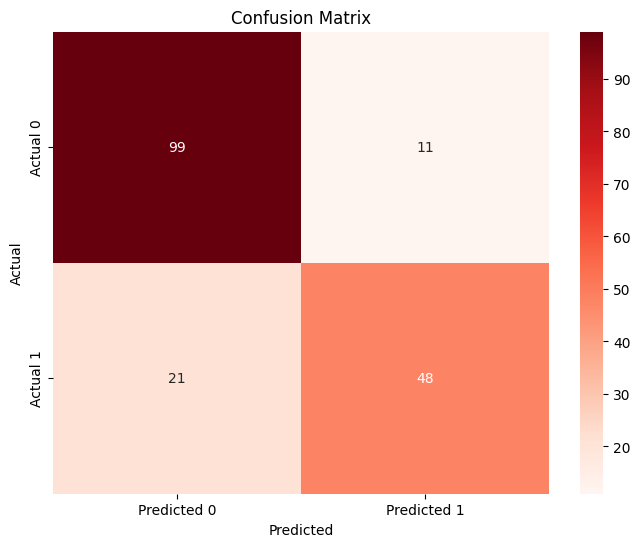

In [107]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()